# Introduction



### Import TensorFlow

In [60]:
import tensorflow as tf
import keras

# The Dataset
### Import MNIST

In [3]:
import keras
from keras.datasets import mnist

### Shapes of Imported Arrays

In [25]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Plot an Image Example

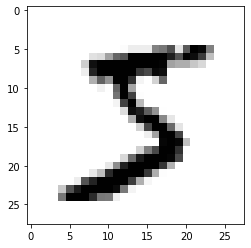

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")

### Display Labels

In [14]:
Y_train[0]

5

In [15]:
print(set(Y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding

### Encoding Labels

In [22]:
from tensorflow.keras.utils import to_categorical
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

### Validated Shapes

In [23]:
print(Y_train_encoded.shape)
print(Y_test_encoded.shape)

(60000, 10)
(10000, 10)


### Display Encoded Labels

In [24]:
Y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Neural Networks


# Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [30]:
import numpy as np
X_train_reshaped = np.reshape(X_train,(X_train.shape[0], 28*28))
X_test_reshaped = np.reshape(X_test,(X_test.shape[0], 28*28))

### Display Pixel Values

In [32]:
print(set(X_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [42]:
x_mean  = np.mean (X_train_reshaped)
x_std  = np.std (X_train_reshaped)
epsilon = 1e-10
x_train_norm =  (X_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (X_test_reshaped - x_mean)/(x_std + epsilon)

### Display Normalized Pixel Values

In [43]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Creating a Model
### Creating the Model

In [38]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
Dense(128, activation= 'relu', input_shape = (784,)),
Dense(128, activation = 'relu'),
Dense(10, activation = 'softmax'),
    ])

### Compiling the Model

In [39]:
model.compile(optimizer='sgd',loss = 'categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

### Training the Model

In [44]:
model.fit(x_train_norm,Y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3700 - accuracy: 0.8932
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1775 - accuracy: 0.9477
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1349 - accuracy: 0.9608


### Evaluating the Model

In [47]:
loss,accuracy = model.evaluate(x_test_norm, Y_test_encoded)
print("The accuracy is",accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9605
The accuracy is 96.05000019073486


# Predictions

### Predictions on Test Set

In [53]:
preds = model.predict(x_test_norm)
print("The shape of prediction: ", preds.shape)

The shape of prediction:  (10000, 10)


### Plotting the Results

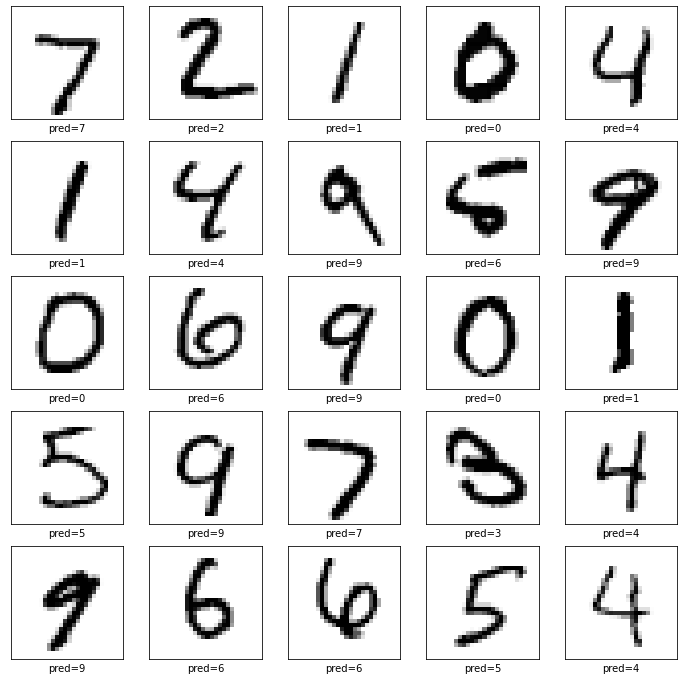

In [61]:
plt.figure(figsize=(12,12))
startindex=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[startindex+i])
    gt = Y_test[startindex + i]
    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel('pred={}'.format(pred))
    plt.imshow(X_test[startindex+i],cmap="binary")
plt.show()